In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
dframe = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape')

In [3]:
dframe.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df = pd.DataFrame()

In [5]:
df = dframe[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


Price


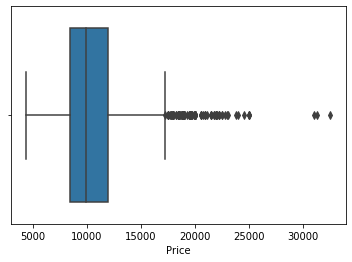

Age_08_04


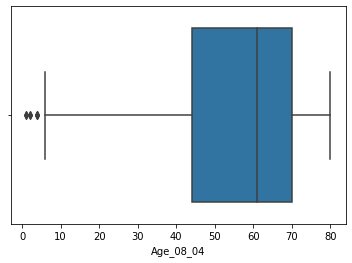

KM


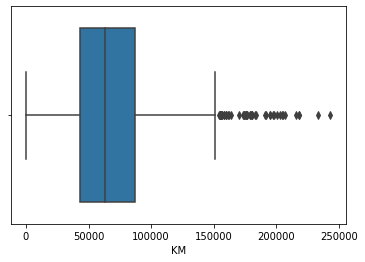

HP


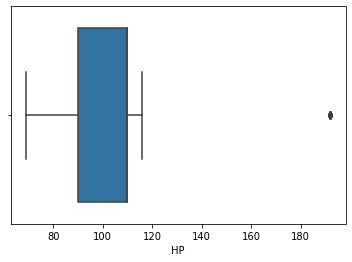

cc


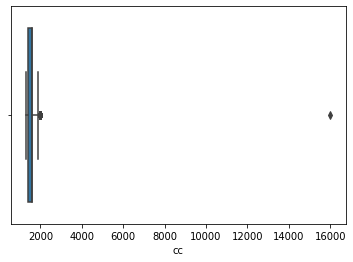

Doors


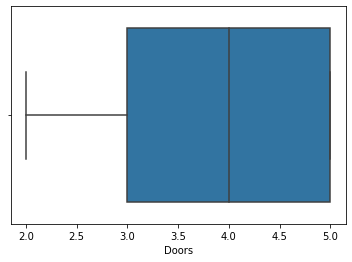

Gears


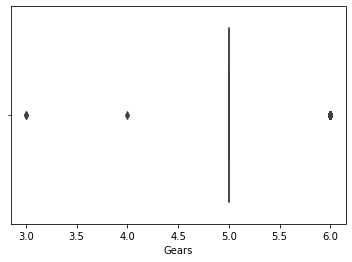

Quarterly_Tax


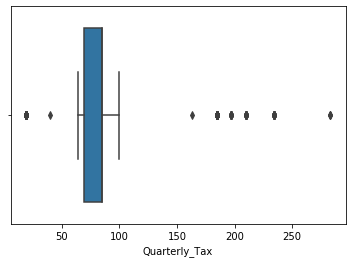

Weight


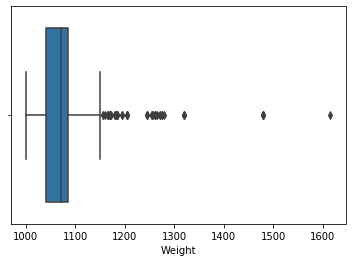

In [8]:
for i in df.columns:
    sns.boxplot(x=i, data=df)
    print(i)
    plt.show()

If we see all the boxplots we can conclude that all of them contain Outliers and we need to handle those.

Price


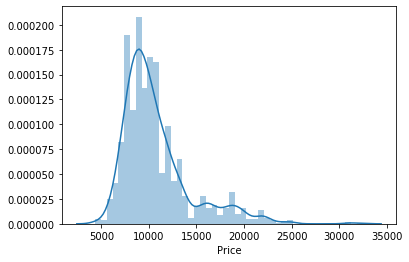

Age_08_04


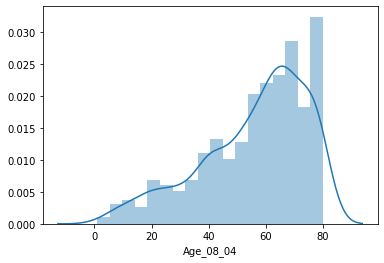

KM


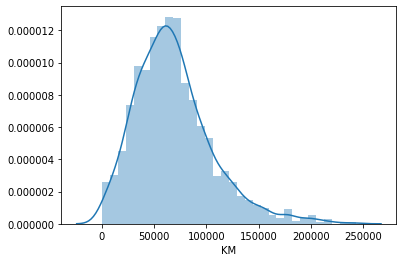

HP


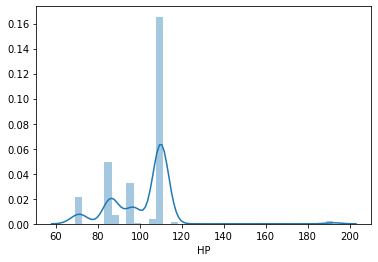

cc


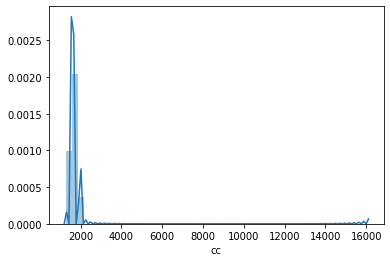

Doors


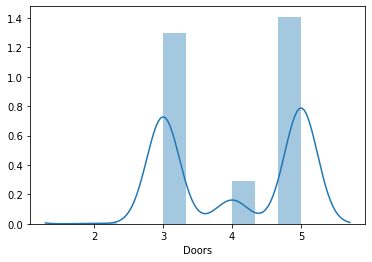

Quarterly_Tax


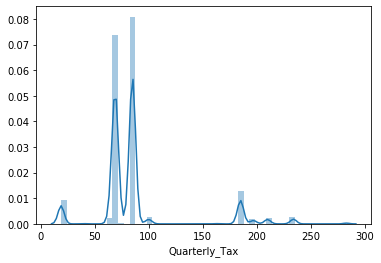

Weight


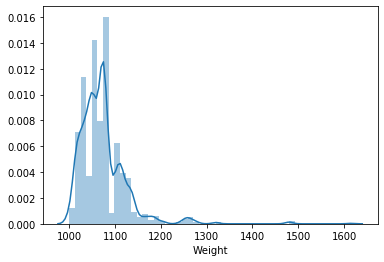

In [9]:
for i in df.columns:
    if i != 'Gears':
        sns.distplot(df[i])
        print(i)
        plt.show()

In [10]:
#sns.distplot(df['Gears'], kde)
#plt.show()

-------------------------------------------------------------------------------------
Iteration for  {'Price'}


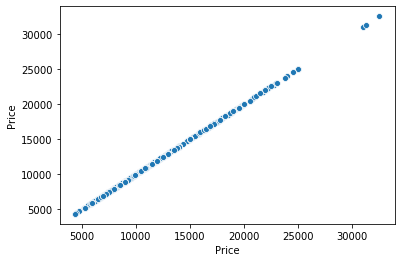

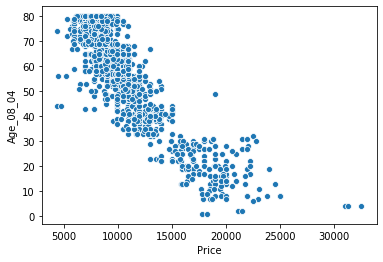

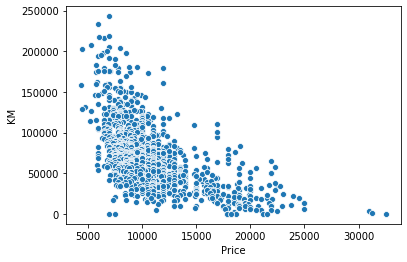

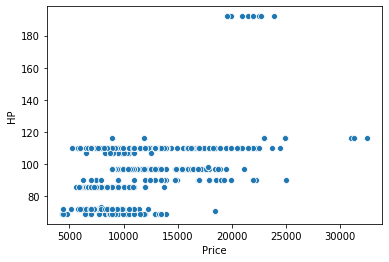

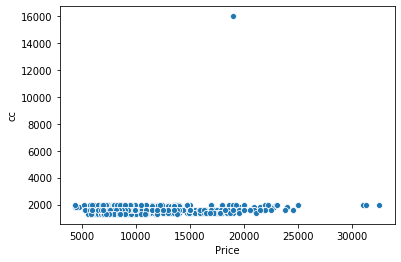

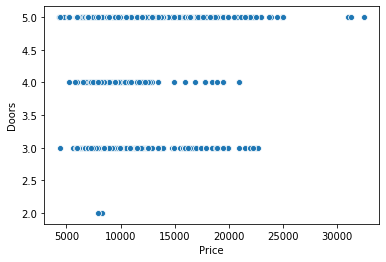

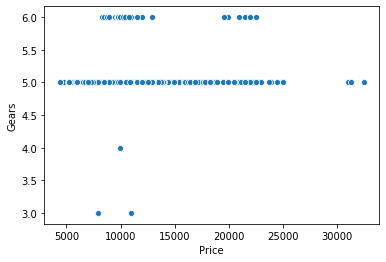

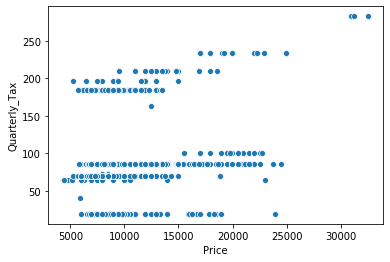

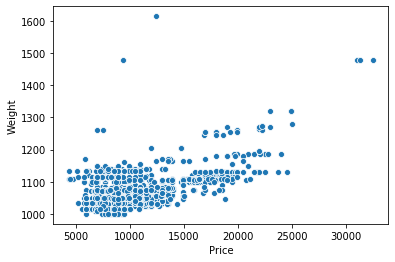

-------------------------------------------------------------------------------------
Iteration for  {'Age_08_04'}


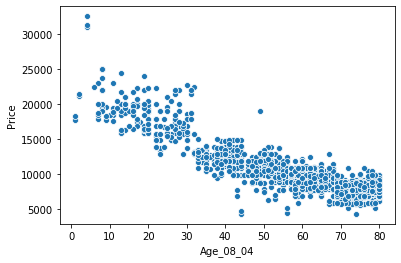

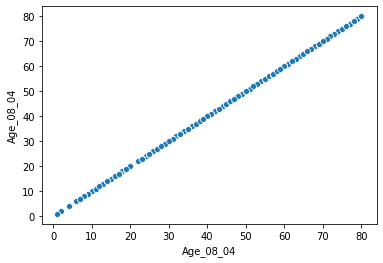

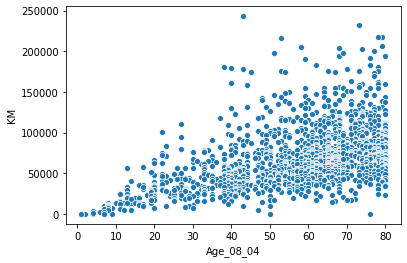

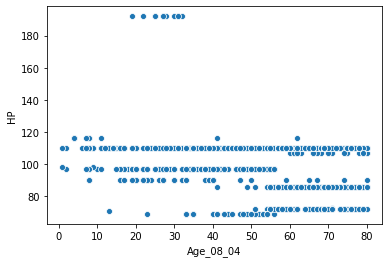

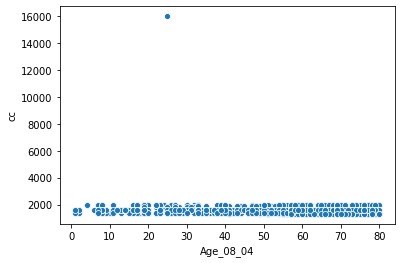

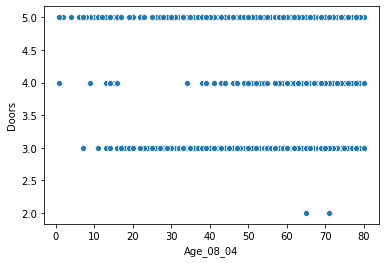

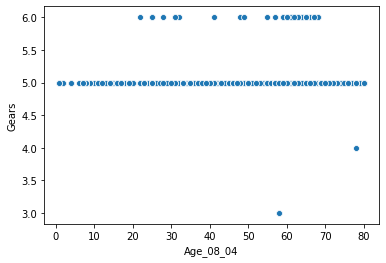

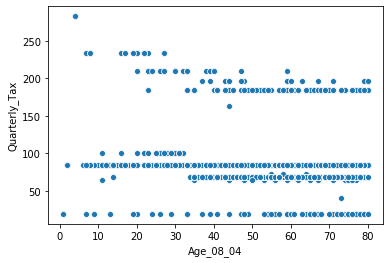

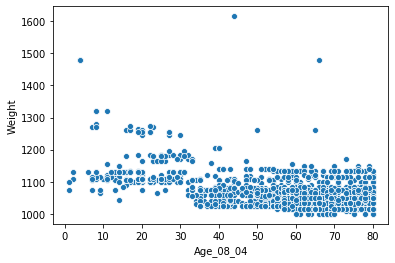

-------------------------------------------------------------------------------------
Iteration for  {'KM'}


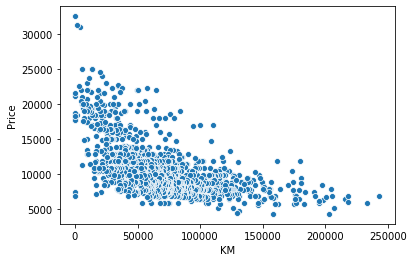

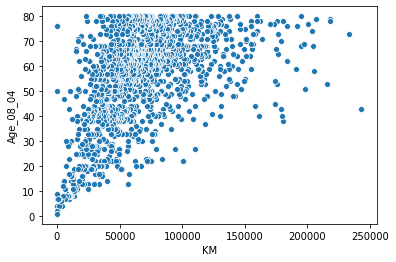

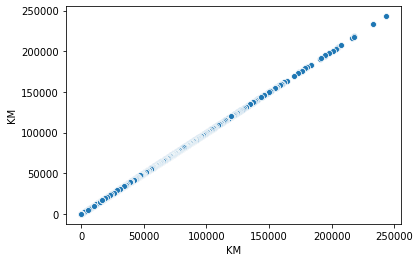

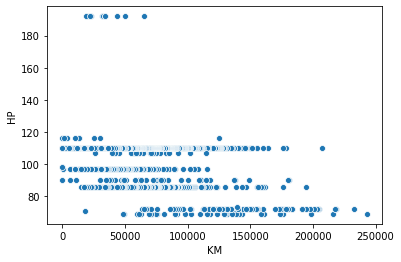

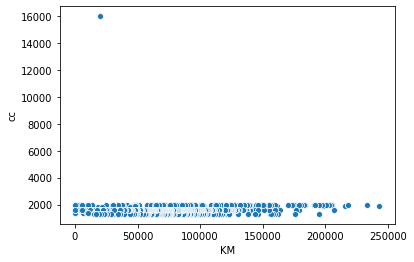

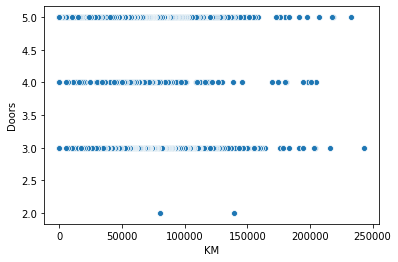

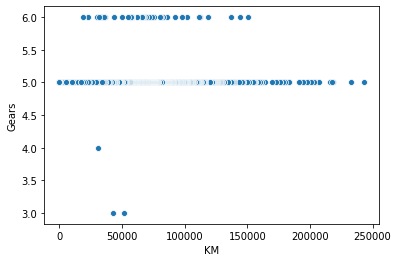

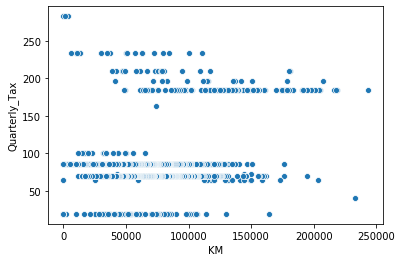

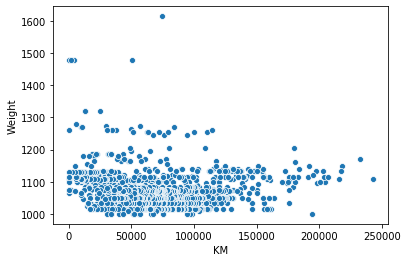

-------------------------------------------------------------------------------------
Iteration for  {'HP'}


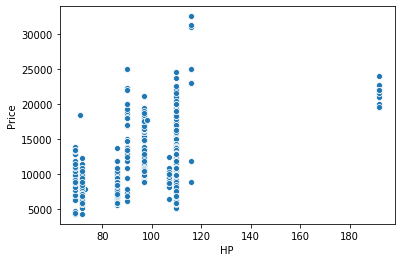

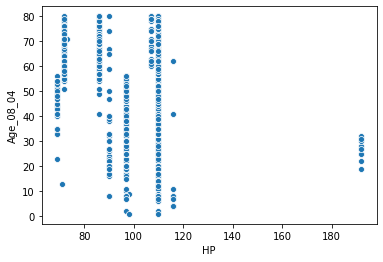

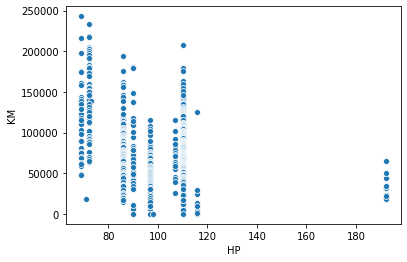

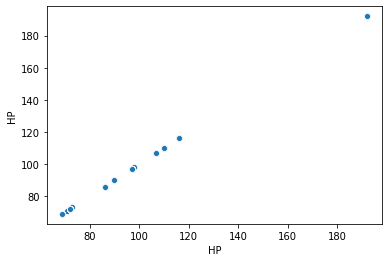

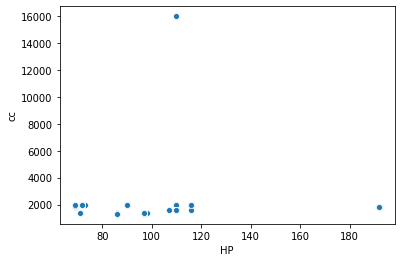

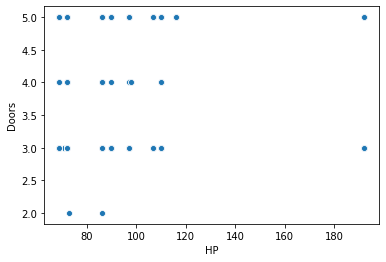

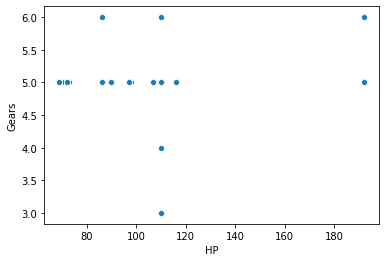

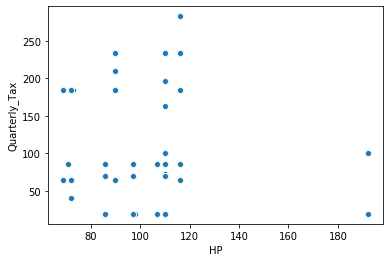

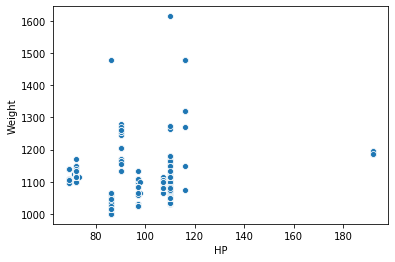

-------------------------------------------------------------------------------------
Iteration for  {'cc'}


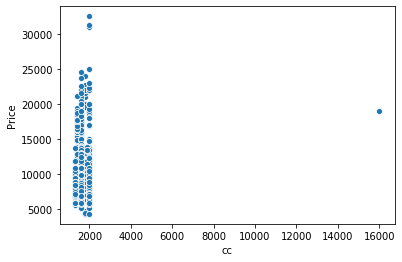

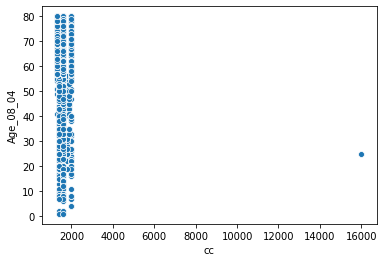

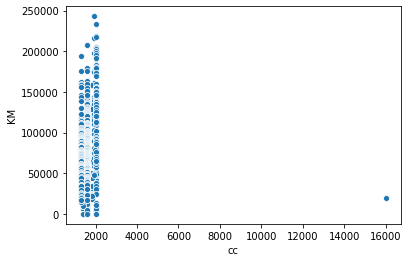

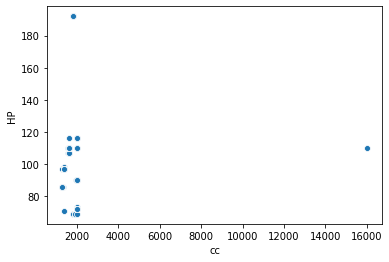

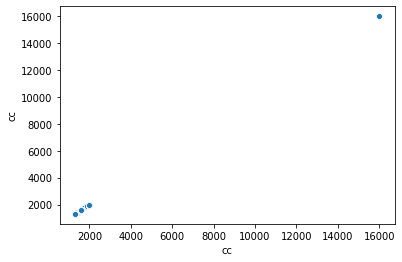

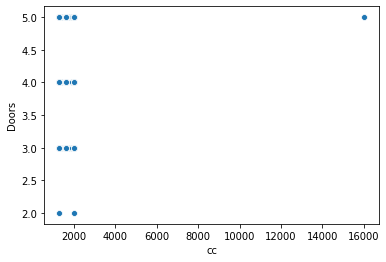

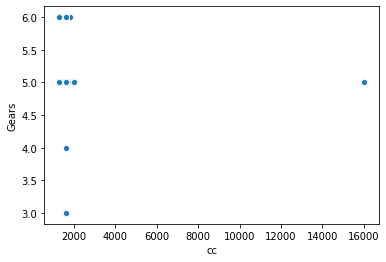

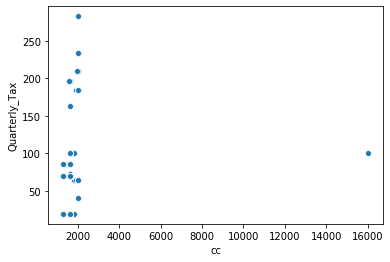

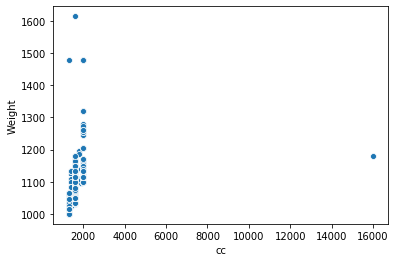

-------------------------------------------------------------------------------------
Iteration for  {'Doors'}


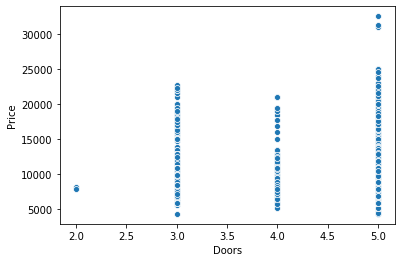

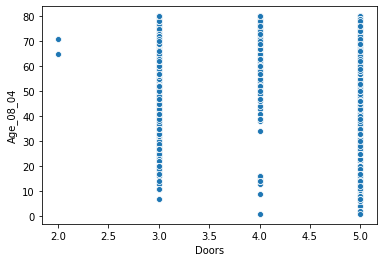

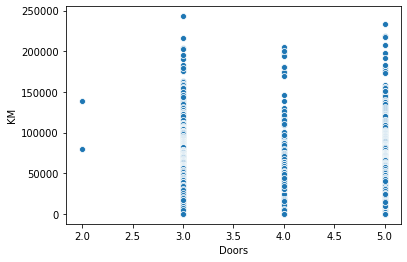

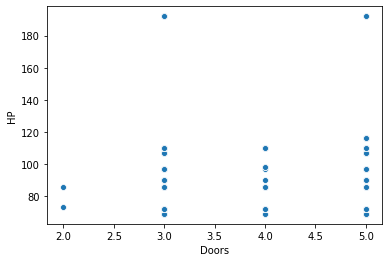

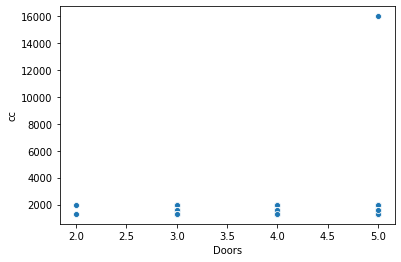

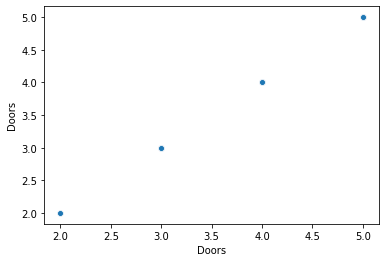

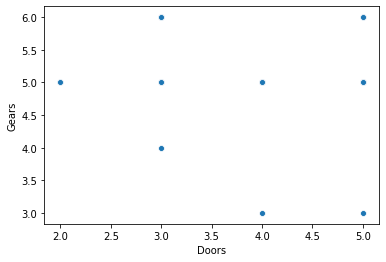

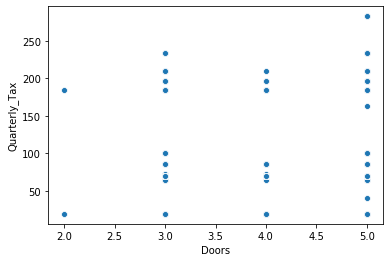

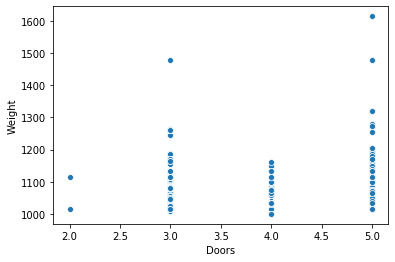

-------------------------------------------------------------------------------------
Iteration for  {'Gears'}


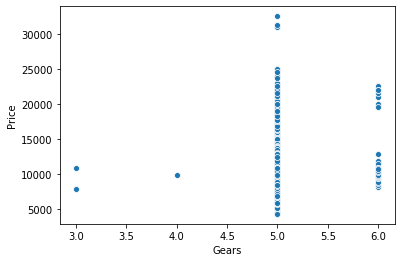

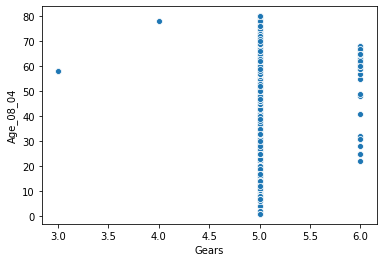

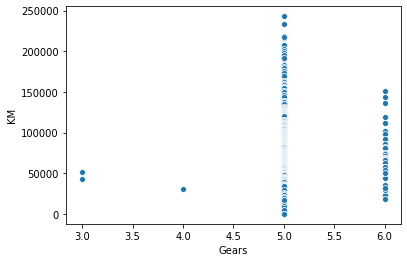

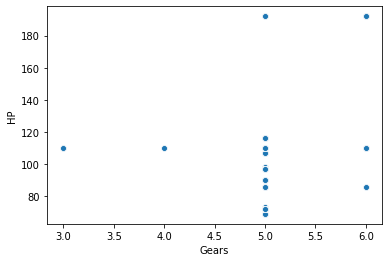

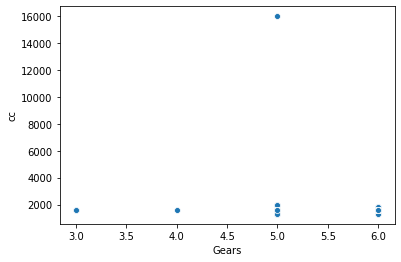

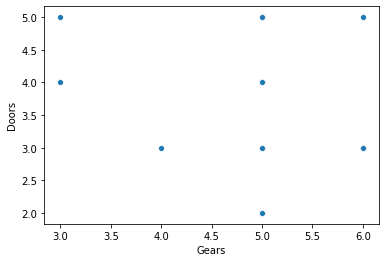

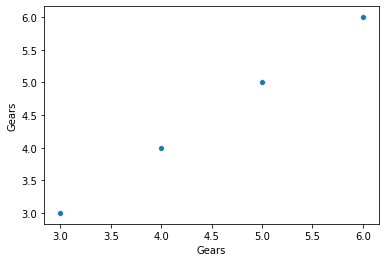

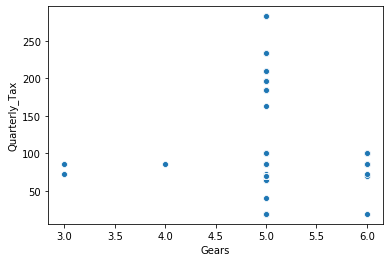

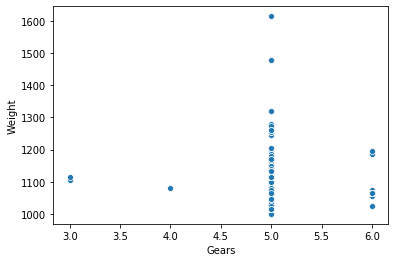

-------------------------------------------------------------------------------------
Iteration for  {'Quarterly_Tax'}


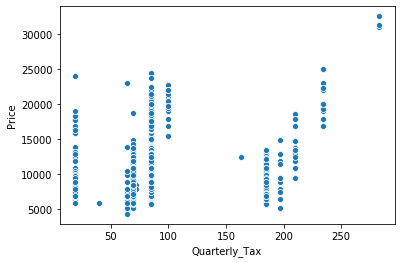

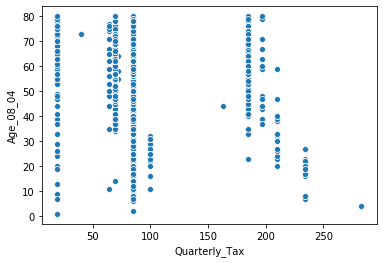

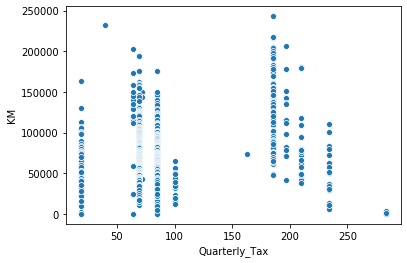

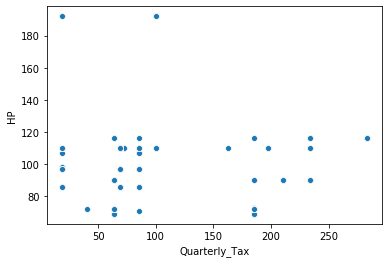

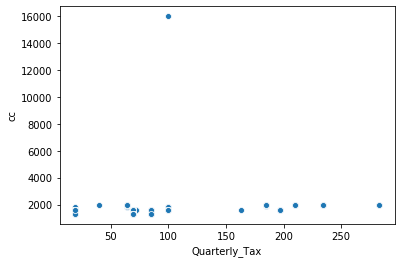

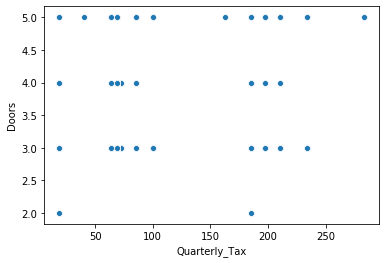

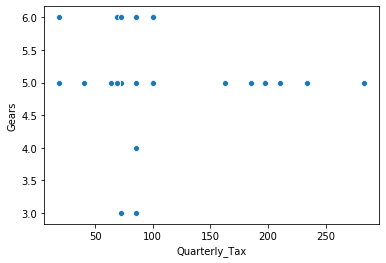

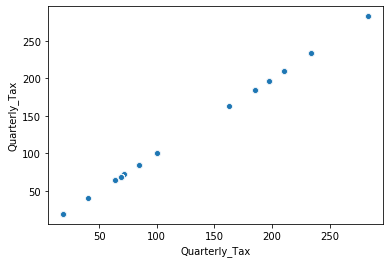

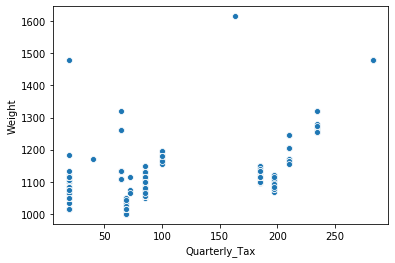

-------------------------------------------------------------------------------------
Iteration for  {'Weight'}


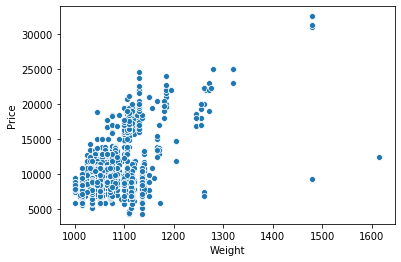

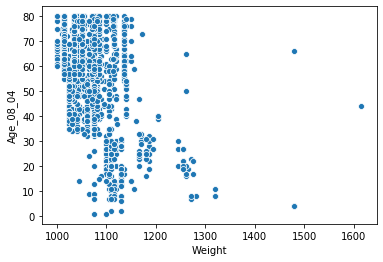

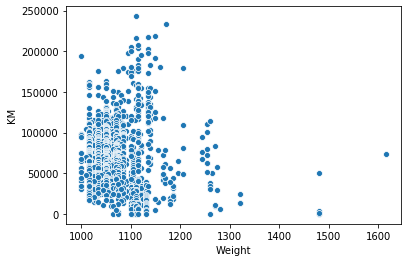

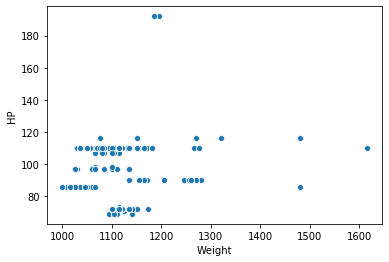

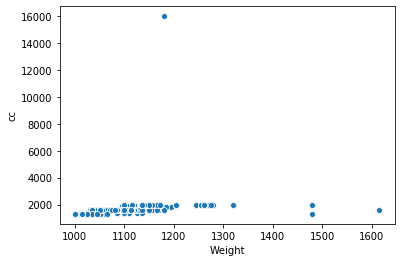

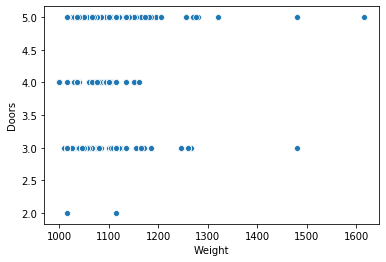

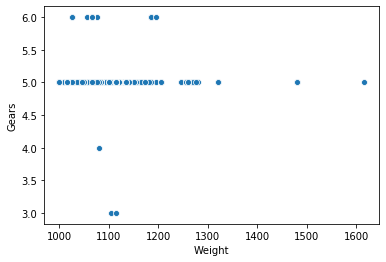

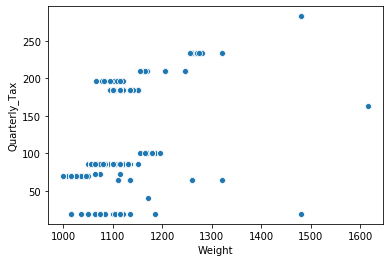

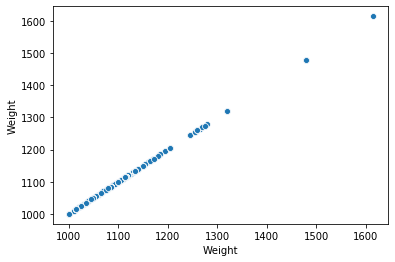

In [11]:
for i in df.columns:
    print('-------------------------------------------------------------------------------------')
    print(f'Iteration for ',{i})
    for j in df.columns:
        sns.scatterplot(x=i, y=j, data=df)
        plt.show()

sns.pairplot(df)
plt.show()

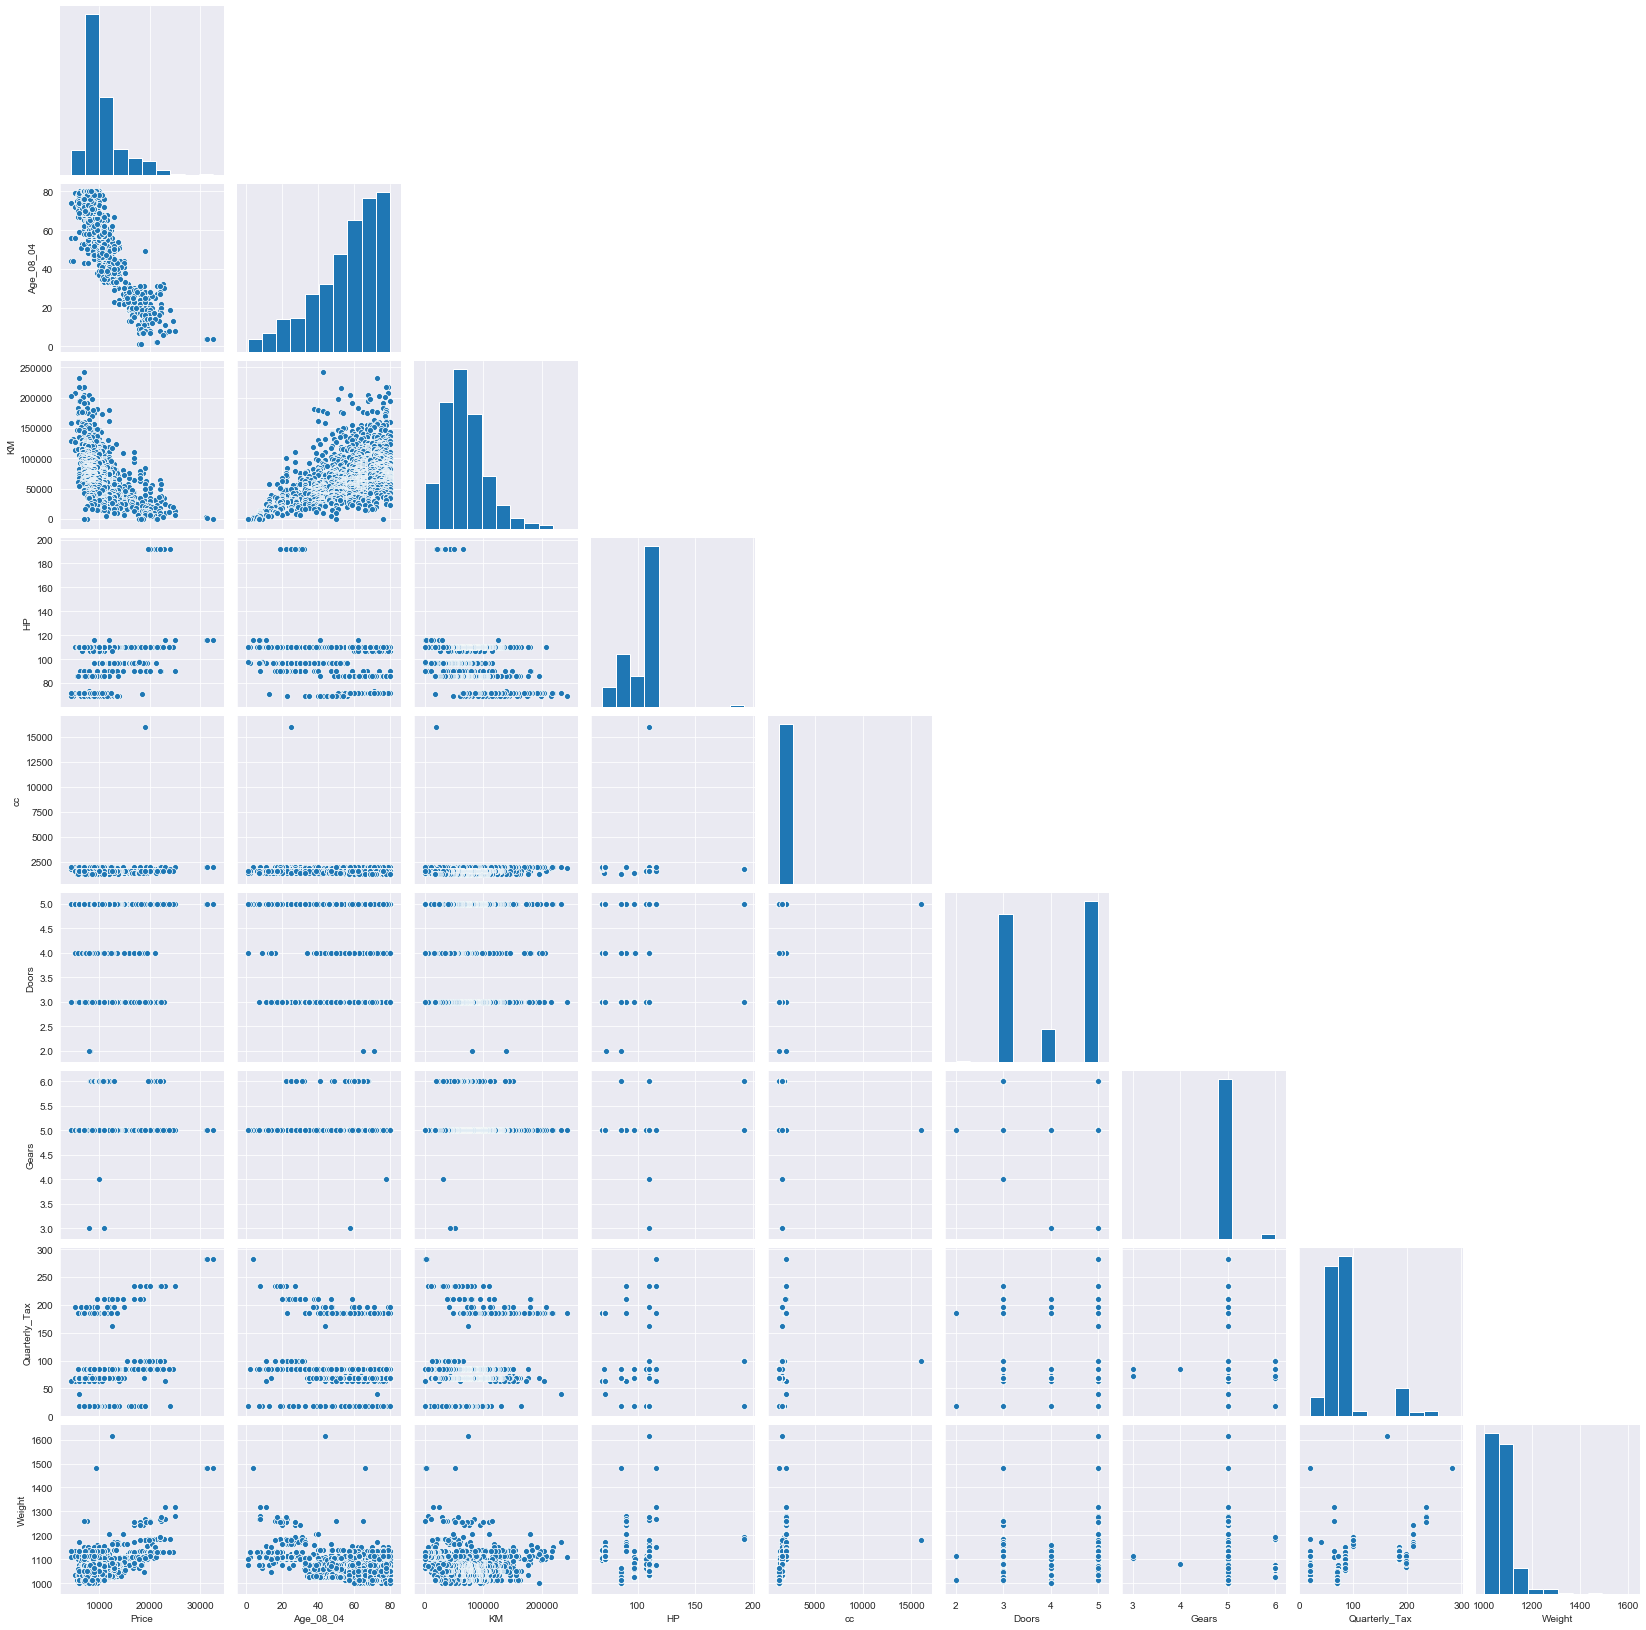

In [12]:
sns.set_style(style='darkgrid')
df_attr = df.iloc[:, :]
sns.pairplot(df_attr, corner=True, diag_kind='auto')
plt.show()

In [13]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


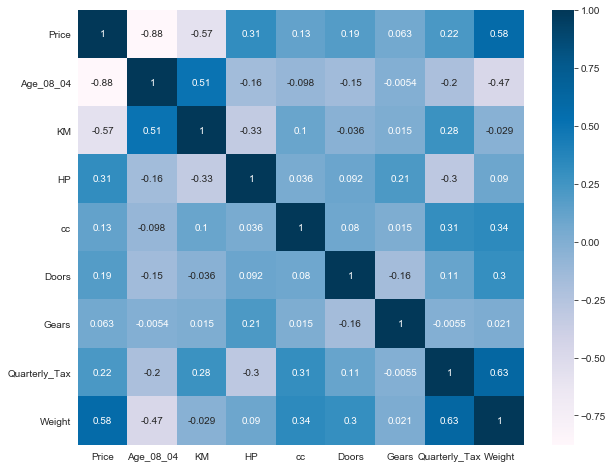

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='PuBu')
plt.show()

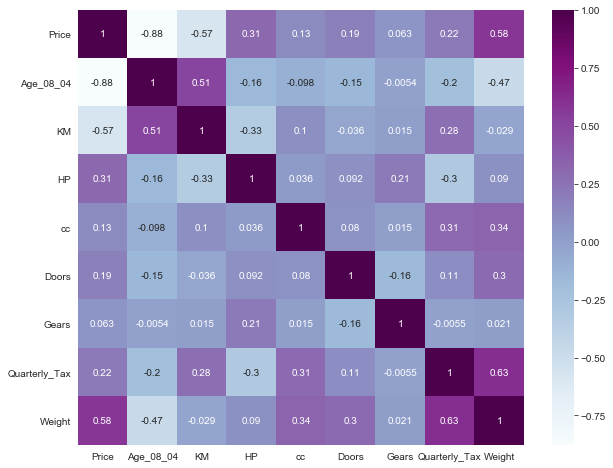

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='BuPu')
plt.show()

In [16]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [17]:
individual_rsquared_adj = pd.DataFrame(columns=['Name', 'Adjusted_Rsquare'])
individual_rsquared_adj

,Name,Adjusted_Rsquare


In [18]:
import statsmodels.formula.api as smf

### From Correlation we can see Price has very good correlation with Age

##### So lets see how much accuracy we can get only with Price and Age

# Price ~ Age  (0.768)

In [19]:
formula = 'Price ~ Age_08_04'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:26   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.82494


# Price ~ Weight (0.337)

In [21]:
formula = 'Price ~ Weight'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.63e-130
Time:                        17:25:26   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885


# Price ~ KM (0.324)

In [23]:
formula = 'Price ~ KM'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.76e-124
Time:                        17:25:26   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378


# Price ~ HP (0.099)

In [25]:
formula = 'Price ~ HP'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.93e-34
Time:                        17:25:27   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043


# Price ~ Quarterly_Tax (0.047)

In [27]:
formula = 'Price ~ Quarterly_Tax'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.41e-17
Time:                        17:25:27   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9046.7382    218.889     41.330      0.000    8617.362    9476.115
Quarterly_Tax    19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043
4,Price ~ Quarterly_Tax,4.738344


# Price ~ Doors (0.034)

In [29]:
formula = 'Price ~ Doors'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.46e-12
Time:                        17:25:27   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043
4,Price ~ Quarterly_Tax,4.738344
5,Price ~ Doors,3.367216


# Price ~ cc (0.015)

In [31]:
formula = 'Price ~ cc'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.55e-06
Time:                        17:25:27   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043
4,Price ~ Quarterly_Tax,4.738344
5,Price ~ Doors,3.367216
6,Price ~ cc,1.528802


# Price ~ Gears (0.003)

In [33]:
formula = 'Price ~ Gears'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Wed, 11 Oct 2023   Prob (F-statistic):             0.0168
Time:                        17:25:27   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adjusted_Rsquare': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043
4,Price ~ Quarterly_Tax,4.738344
5,Price ~ Doors,3.367216
6,Price ~ cc,1.528802
7,Price ~ Gears,0.328752


### Lets see top 3 Positively or Negatively correlated columns to the Price Column(Target or Dependent)

In [35]:
## 'Price ~ Age_08_04 + Weight + KM' - 0.848

In [36]:
formula = 'Price ~ Age_08_04 + Weight + KM'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1880.3356    962.718     -1.953      0.051   -3768.825       8.153
Age_08_04   -120.2212      2.742    -43.841      0.000    -125.600    -114.842
Weight        19.5760      0.836     23.409      0.000      17.936      21.216
KM            -0.0242      0.001    -20.142      0.000      -0.027      -0.022
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                     2.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 'Price ~ Age_08_04 + Weight + KM + HP' - 0.861

In [37]:
formula = 'Price ~ Age_08_04 + Weight + KM + HP'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
Age_08_04   -122.4245      2.623    -46.668      0.000    -127.570    -117.278
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
HP            30.2119      2.539     11.897      0.000      25.230      35.193
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax' - 0.862

In [38]:
formula = 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1797.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2554.4355   1048.246     -2.437      0.015   -4610.700    -498.171
Age_08_04      -121.8366      2.623    -46.454      0.000    -126.981    -116.692
Weight           16.5860      1.022     16.224      0.000      14.581      18.591
KM               -0.0207      0.001    -16.543      0.000      -0.023      -0.018
HP               33.3411      2.731     12.209      0.000      27.984      38.698
Quarterly_Tax     3.9716      1.298      3.060      0.002       1.425       6.518
==============================================================================
Omnibus:                      144.527   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.235
Skew:                          -0.209   Prob(JB):                    2.21e-198
Kurtosis:                       6.878   Cond. No.                     2.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax + Doors' - 0.862

In [39]:
formula = 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax + Doors'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1497.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2632.4015   1056.392     -2.492      0.013   -4704.647    -560.156
Age_08_04      -121.8367      2.623    -46.444      0.000    -126.983    -116.691
Weight           16.7492      1.058     15.837      0.000      14.675      18.824
KM               -0.0207      0.001    -16.529      0.000      -0.023      -0.018
HP               33.3826      2.732     12.218      0.000      28.023      38.742
Quarterly_Tax     3.9028      1.303      2.995      0.003       1.346       6.459
Doors           -23.7998     39.398     -0.604      0.546    -101.083      53.484
==============================================================================
Omnibus:                      147.853   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.730
Skew:                          -0.220   Prob(JB):                    2.63e-206
Kurtosis:                       6.953   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax + Doors + cc' - 0.862

In [40]:
formula = 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax + Doors + cc'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2750.5553   1059.491     -2.596      0.010   -4828.881    -672.229
Age_08_04      -121.7928      2.623    -46.439      0.000    -126.937    -116.648
Weight           16.9852      1.071     15.860      0.000      14.884      19.086
KM               -0.0205      0.001    -16.395      0.000      -0.023      -0.018
HP               33.7306      2.743     12.297      0.000      28.350      39.111
Quarterly_Tax     4.1227      1.312      3.141      0.002       1.548       6.697
Doors           -24.5339     39.389     -0.623      0.533    -101.799      52.732
cc               -0.1251      0.090     -1.385      0.166      -0.302       0.052
==============================================================================
Omnibus:                      151.778   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.853
Skew:                          -0.231   Prob(JB):                    2.54e-216
Kurtosis:                       7.047   Cond. No.                     2.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
variables

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [43]:
vif = pd.DataFrame()
vif

""


In [44]:
vif_results = pd.DataFrame(columns=['Name', 'Without_Column', 'VIF_value','Adjusted_Rsquare'])
vif_results

,Name,Without_Column,VIF_value,Adjusted_Rsquare


In [45]:
variables.values

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [46]:
variables.shape[1]

8

In [47]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,16.392684,Age_08_04
1,7.590522,KM
2,64.894960,HP
3,17.199750,cc
4,21.874692,Doors
5,438.631804,Gears
6,11.020074,Quarterly_Tax
7,543.133076,Weight


## VIF is Variance Inflation Factor 
## VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem

#### We should also not remove all the columns which have VIF more than 10 at one shot we have to do it in one after another in Descending to Ascending order.

In [48]:
vif['VIF'].max()

543.1330758695781

#### Lets see without 'Weight' column

In [49]:
formula = 'Price ~ Age_08_04 + KM + HP + Quarterly_Tax + Doors + cc + Gears'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1069.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.500e+04
Df Residuals:                    1428   BIC:                         2.504e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9980.6587   1101.951      9.057      0.000    7819.042    1.21e+04
Age_08_04      -136.3855      2.652    -51.426      0.000    -141.588    -131.183
KM               -0.0201      0.001    -14.793      0.000      -0.023      -0.017
HP               43.5743      2.946     14.790      0.000      37.795      49.354
Quarterly_Tax    16.1981      1.148     14.108      0.000      13.946      18.450
Doors           157.9483     41.991      3.762      0.000      75.578     240.318
cc                0.1066      0.096      1.106      0.269      -0.083       0.296
Gears           620.1432    213.676      2.902      0.004     200.990    1039.296
==============================================================================
Omnibus:                      211.411   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.784
Skew:                           0.690   Prob(JB):                    5.15e-167
Kurtosis:                       6.301   Cond. No.                     2.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model.rsquared_adj*100

83.89021332659634

In [51]:
vif_results = vif_results.append({'Name' : 'Price ~ Age_08_04 + KM + HP + Quarterly_Tax + Doors + cc + Gears', 'Without_Column': 'Weight','VIF_value': vif['VIF'].max(), 'Adjusted_Rsquare' : model.rsquared_adj*100}, ignore_index = True)
vif_results

,Name,Without_Column,VIF_value,Adjusted_Rsquare
0,Price ~ Age_08_04 + KM + HP + Quarterly_Tax + ...,Weight,543.133076,83.890213


In [52]:
vif['features']

0        Age_08_04
1               KM
2               HP
3               cc
4            Doors
5            Gears
6    Quarterly_Tax
7           Weight
Name: features, dtype: object

In [53]:
variables = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,16.029155,Age_08_04
1,7.588833,KM
2,61.848959,HP
3,16.686538,cc
4,18.658153,Doors
5,107.316771,Gears
6,8.239199,Quarterly_Tax


In [54]:
vif['VIF'].max()

107.31677121923923

#### Lets see without 'Gears' column

In [55]:
formula = 'Price ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1239.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -12497.
No. Observations:                1436   AIC:                         2.501e+04
Df Residuals:                    1429   BIC:                         2.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.295e+04    409.080     31.660      0.000    1.21e+04    1.38e+04
Age_08_04      -136.5498      2.658    -51.366      0.000    -141.765    -131.335
KM               -0.0198      0.001    -14.578      0.000      -0.022      -0.017
HP               45.7327      2.858     16.000      0.000      40.126      51.339
cc                0.1028      0.097      1.063      0.288      -0.087       0.292
Doors           134.2946     41.299      3.252      0.001      53.281     215.308
Quarterly_Tax    16.3993      1.149     14.272      0.000      14.145      18.653
==============================================================================
Omnibus:                      202.288   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.719
Skew:                           0.665   Prob(JB):                    1.41e-156
Kurtosis:                       6.198   Cond. No.                     8.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']

In [56]:
vif_results = vif_results.append({'Name' : 'Price ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax', 'Without_Column': 'Gears', 'VIF_value': vif['VIF'].max(), 'Adjusted_Rsquare' : model.rsquared_adj*100}, ignore_index = True)
vif_results

,Name,Without_Column,VIF_value,Adjusted_Rsquare
0,Price ~ Age_08_04 + KM + HP + Quarterly_Tax + ...,Weight,543.133076,83.890213
1,Price ~ Age_08_04 + KM + HP + cc + Doors + Qua...,Gears,107.316771,83.806529


In [57]:
variables = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,13.459894,Age_08_04
1,7.567643,KM
2,25.515783,HP
3,16.172176,cc
4,17.557084,Doors
5,7.161328,Quarterly_Tax


In [58]:
vif['VIF'].max()

25.5157827926114

#### Lets see without 'HP' column

In [59]:
formula = 'Price ~ Age_08_04 + KM + cc + Doors + Quarterly_Tax'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1218.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:28   Log-Likelihood:                -12615.
No. Observations:                1436   AIC:                         2.524e+04
Df Residuals:                    1430   BIC:                         2.527e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.785e+04    294.598     60.588      0.000    1.73e+04    1.84e+04
Age_08_04      -139.4514      2.879    -48.438      0.000    -145.099    -133.804
KM               -0.0238      0.001    -16.432      0.000      -0.027      -0.021
cc                0.3237      0.104      3.116      0.002       0.120       0.527
Doors           202.8118     44.589      4.548      0.000     115.345     290.278
Quarterly_Tax    11.3107      1.199      9.437      0.000       8.959      13.662
==============================================================================
Omnibus:                      327.492   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1692.675
Skew:                           0.966   Prob(JB):                         0.00
Kurtosis:                       7.956   Cond. No.                     5.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
vif_results = vif_results.append({'Name' : 'Price ~ Age_08_04 + KM + cc + Doors + Quarterly_Tax', 'Without_Column': 'HP', 'VIF_value': vif['VIF'].max(), 'Adjusted_Rsquare' : model.rsquared_adj*100}, ignore_index = True)
vif_results

,Name,Without_Column,VIF_value,Adjusted_Rsquare
0,Price ~ Age_08_04 + KM + HP + Quarterly_Tax + ...,Weight,543.133076,83.890213
1,Price ~ Age_08_04 + KM + HP + cc + Doors + Qua...,Gears,107.316771,83.806529
2,Price ~ Age_08_04 + KM + cc + Doors + Quarterl...,HP,25.515783,80.918800


In [61]:
variables = df[['Age_08_04', 'KM', 'cc', 'Doors', 'Quarterly_Tax']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,11.004997,Age_08_04
1,7.102056,KM
2,13.009825,cc
3,11.969207,Doors
4,7.161051,Quarterly_Tax


In [62]:
vif['VIF'].max()

13.009825237739628

#### Lets see without 'cc' column

In [63]:
formula = 'Price ~ Age_08_04 + KM + Doors + Quarterly_Tax'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1511.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:28   Log-Likelihood:                -12620.
No. Observations:                1436   AIC:                         2.525e+04
Df Residuals:                    1431   BIC:                         2.528e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.827e+04    262.698     69.545      0.000    1.78e+04    1.88e+04
Age_08_04      -139.9762      2.883    -48.557      0.000    -145.631    -134.321
KM               -0.0235      0.001    -16.241      0.000      -0.026      -0.021
Doors           208.8905     44.681      4.675      0.000     121.242     296.539
Quarterly_Tax    12.2130      1.167     10.469      0.000       9.925      14.501
==============================================================================
Omnibus:                      328.014   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1654.024
Skew:                           0.975   Prob(JB):                         0.00
Kurtosis:                       7.883   Cond. No.                     4.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
vif_results = vif_results.append({'Name' : 'Price ~ Age_08_04 + KM + Doors + Quarterly_Tax', 'Without_Column': 'cc', 'VIF_value': vif['VIF'].max(), 'Adjusted_Rsquare' : model.rsquared_adj*100}, ignore_index = True)
vif_results

,Name,Without_Column,VIF_value,Adjusted_Rsquare
0,Price ~ Age_08_04 + KM + HP + Quarterly_Tax + ...,Weight,543.133076,83.890213
1,Price ~ Age_08_04 + KM + HP + cc + Doors + Qua...,Gears,107.316771,83.806529
2,Price ~ Age_08_04 + KM + cc + Doors + Quarterl...,HP,25.515783,80.918800
3,Price ~ Age_08_04 + KM + Doors + Quarterly_Tax,cc,13.009825,80.802691


In [65]:
variables = df[['Age_08_04', 'KM', 'Doors', 'Quarterly_Tax']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,10.125084,Age_08_04
1,7.096095,KM
2,9.298469,Doors
3,5.945611,Quarterly_Tax


In [66]:
vif['VIF'].max()

10.125083890719766

#### Lets see without 'Age_08_04' column

In [67]:
formula = 'Price ~ KM + Doors + Quarterly_Tax'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     464.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.05e-210
Time:                        17:25:28   Log-Likelihood:                -13319.
No. Observations:                1436   AIC:                         2.665e+04
Df Residuals:                    1432   BIC:                         2.667e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.037e+04    335.494     30.909      0.000    9711.517     1.1e+04
KM               -0.0653      0.002    -34.396      0.000      -0.069      -0.062
Doors           448.3749     72.234      6.207      0.000     306.680     590.070
Quarterly_Tax    34.7605      1.741     19.968      0.000      31.346      38.175
==============================================================================
Omnibus:                      193.463   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.588
Skew:                           0.907   Prob(JB):                     2.19e-68
Kurtosis:                       4.386   Cond. No.                     3.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
vif_results = vif_results.append({'Name' : 'Price ~ KM + Doors + Quarterly_Tax', 'Without_Column': 'Age_08_04', 'VIF_value': vif['VIF'].max(), 'Adjusted_Rsquare' : model.rsquared_adj*100}, ignore_index = True)
vif_results

,Name,Without_Column,VIF_value,Adjusted_Rsquare
0,Price ~ Age_08_04 + KM + HP + Quarterly_Tax + ...,Weight,543.133076,83.890213
1,Price ~ Age_08_04 + KM + HP + cc + Doors + Qua...,Gears,107.316771,83.806529
2,Price ~ Age_08_04 + KM + cc + Doors + Quarterl...,HP,25.515783,80.918800
3,Price ~ Age_08_04 + KM + Doors + Quarterly_Tax,cc,13.009825,80.802691
4,Price ~ KM + Doors + Quarterly_Tax,Age_08_04,10.125084,49.208418


In [69]:
variables = df[['KM', 'Doors', 'Quarterly_Tax']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.243863,KM
1,5.694925,Doors
2,5.713779,Quarterly_Tax


In [70]:
final_results = pd.DataFrame(columns=['Name', 'Train_Result', 'Test_Result'])
final_results

,Name,Train_Result,Test_Result


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Let's take just top 4 correlated columns for algorithm

In [72]:
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043
4,Price ~ Quarterly_Tax,4.738344
5,Price ~ Doors,3.367216
6,Price ~ cc,1.528802
7,Price ~ Gears,0.328752


## 'Age_08_04' 'Weight' 'KM' 'HP' 

# Normal Transformation

In [73]:
X = df[['Age_08_04', 'Weight', 'KM', 'HP']]
y = df[['Price']]

In [74]:
X.head()

,Age_08_04,Weight,KM,HP
0,23,1165,46986,90
1,23,1165,72937,90
2,24,1165,41711,90
3,26,1165,48000,90
4,30,1170,38500,90


In [75]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [77]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1005, 4) (431, 4) (1005, 1) (431, 1)


In [78]:
multiLR_model= LinearRegression()
multiLR_model.fit(X_train, y_train)

LinearRegression()

In [79]:
multiLR_model.coef_

array([[-1.15402566e+02,  2.24965894e+01, -2.15938033e-02,
         2.76296224e+01]])

In [80]:
X_train.columns

Index(['Age_08_04', 'Weight', 'KM', 'HP'], dtype='object')

In [81]:
enumerate(X_train.columns)

In [82]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model.coef_[0][idx]))

The coefficient for Age_08_04 is -115.4025655736333
The coefficient for Weight is 22.496589379190006
The coefficient for KM is -0.0215938033224338
The coefficient for HP is 27.629622388499865


In [83]:
multiLR_model.intercept_

array([-8288.08935253])

In [84]:
multiLR_model.intercept_[0]

-8288.089352525272

In [85]:
intercept = multiLR_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8288.089352525272


In [86]:
train_score = multiLR_model.score(X_train, y_train)
train_score

0.8695898050100055

In [87]:
test_score = multiLR_model.score(X_test, y_test)
test_score

0.8363616738950517

In [88]:
df1 = df[['Age_08_04', 'Weight', 'KM', 'HP', 'Price']]

In [89]:
df1.head()

,Age_08_04,Weight,KM,HP,Price
0,23,1165,46986,90,13500
1,23,1165,72937,90,13750
2,24,1165,41711,90,13950
3,26,1165,48000,90,14950
4,30,1170,38500,90,13750


In [90]:
df1['y_pred'] = multiLR_model.predict(X)

In [91]:
df1.head()

,Age_08_04,Weight,KM,HP,Price,y_pred
0,23,1165,46986,90,13500,16738.237838
1,23,1165,72937,90,13750,16177.857048
2,24,1165,41711,90,13950,16736.742585
3,26,1165,48000,90,14950,16370.134025
4,30,1170,38500,90,13750,16226.147841


In [92]:
df1['Error'] = df1['Price'] - df1['y_pred']
df1.head()

,Age_08_04,Weight,KM,HP,Price,y_pred,Error
0,23,1165,46986,90,13500,16738.237838,-3238.237838
1,23,1165,72937,90,13750,16177.857048,-2427.857048
2,24,1165,41711,90,13950,16736.742585,-2786.742585
3,26,1165,48000,90,14950,16370.134025,-1420.134025
4,30,1170,38500,90,13750,16226.147841,-2476.147841


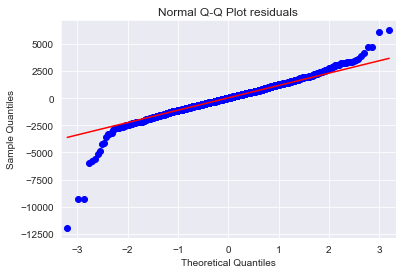

In [93]:
import statsmodels.api as sm
sm.qqplot(df1['Error'], line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [94]:
final_results = final_results.append({'Name': 'Normal Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,86.958981,83.636167


# Log Transformation

In [95]:
X = np.log(df[['Age_08_04', 'Weight', 'KM', 'HP']])
y = np.log(df[['Price']])

In [96]:
X.head()

,Age_08_04,Weight,KM,HP
0,3.135494,7.060476,10.757605,4.49981
1,3.135494,7.060476,11.197351,4.49981
2,3.178054,7.060476,10.638520,4.49981
3,3.258097,7.060476,10.778956,4.49981
4,3.401197,7.064759,10.558414,4.49981


In [97]:
y.head()

,Price
0,9.510445
1,9.528794
2,9.543235
3,9.612467
4,9.528794


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [99]:
multiLR_model_LOG= LinearRegression()
multiLR_model_LOG.fit(X_train, y_train)

LinearRegression()

In [100]:
multiLR_model_LOG.coef_

array([[-0.45129667,  0.74455311,  0.02398588,  0.41875902]])

In [101]:
X_train.columns

Index(['Age_08_04', 'Weight', 'KM', 'HP'], dtype='object')

In [102]:
enumerate(X_train.columns)

In [103]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model_LOG.coef_[0][idx]))

The coefficient for Age_08_04 is -0.45129666827774517
The coefficient for Weight is 0.744553113571268
The coefficient for KM is 0.023985883797595704
The coefficient for HP is 0.4187590210778663


In [104]:
intercept = multiLR_model_LOG.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.6189938859048185


In [105]:
train_score = multiLR_model_LOG.score(X_train, y_train)
train_score

0.7348518749752091

In [106]:
test_score = multiLR_model_LOG.score(X_test, y_test)
test_score

0.7722271965897861

In [107]:
df2 = np.log(df[['Age_08_04', 'Weight', 'KM', 'HP', 'Price']])
df2.head()

,Age_08_04,Weight,KM,HP,Price
0,3.135494,7.060476,10.757605,4.49981,9.510445
1,3.135494,7.060476,11.197351,4.49981,9.528794
2,3.178054,7.060476,10.638520,4.49981,9.543235
3,3.258097,7.060476,10.778956,4.49981,9.612467
4,3.401197,7.064759,10.558414,4.49981,9.528794


In [108]:
df2['y_pred'] = multiLR_model_LOG.predict(X)
df2.head()

,Age_08_04,Weight,KM,HP,Price,y_pred
0,3.135494,7.060476,10.757605,4.49981,9.510445,9.603222
1,3.135494,7.060476,11.197351,4.49981,9.528794,9.613770
2,3.178054,7.060476,10.638520,4.49981,9.543235,9.581159
3,3.258097,7.060476,10.778956,4.49981,9.612467,9.548404
4,3.401197,7.064759,10.558414,4.49981,9.528794,9.481722


In [109]:
df2['Error'] = df2['Price'] - df2['y_pred']
df2.head()

,Age_08_04,Weight,KM,HP,Price,y_pred,Error
0,3.135494,7.060476,10.757605,4.49981,9.510445,9.603222,-0.092777
1,3.135494,7.060476,11.197351,4.49981,9.528794,9.613770,-0.084976
2,3.178054,7.060476,10.638520,4.49981,9.543235,9.581159,-0.037924
3,3.258097,7.060476,10.778956,4.49981,9.612467,9.548404,0.064062
4,3.401197,7.064759,10.558414,4.49981,9.528794,9.481722,0.047072


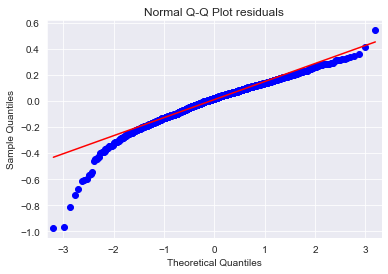

In [110]:
sm.qqplot(df2['Error'], line='q')
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [111]:
final_results = final_results.append({'Name': 'Log Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,86.958981,83.636167
1,Log Transformation,73.485187,77.222720


# Square Transformation

In [112]:
X = df[['Age_08_04', 'Weight', 'KM', 'HP']]**2
y = df[['Price']]**2

In [113]:
X.head()

,Age_08_04,Weight,KM,HP
0,529,1357225,2207684196,8100
1,529,1357225,5319805969,8100
2,576,1357225,1739807521,8100
3,676,1357225,2304000000,8100
4,900,1368900,1482250000,8100


In [114]:
y.head()

,Price
0,182250000
1,189062500
2,194602500
3,223502500
4,189062500


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [116]:
multiLR_model_Square= LinearRegression()
multiLR_model_Square.fit(X_train, y_train)

LinearRegression()

In [117]:
multiLR_model_Square.coef_

array([[-2.35841743e+04,  4.67831154e+02, -3.19187279e-03,
         3.72496826e+03]])

In [118]:
X_train.columns

Index(['Age_08_04', 'Weight', 'KM', 'HP'], dtype='object')

In [119]:
enumerate(X_train.columns)

In [120]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model_Square.coef_[0][idx]))

The coefficient for Age_08_04 is -23584.174331594484
The coefficient for Weight is 467.83115394712235
The coefficient for KM is -0.0031918727919480997
The coefficient for HP is 3724.968262996012


In [121]:
intercept = multiLR_model_Square.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -349023153.99468005


In [122]:
train_score = multiLR_model_Square.score(X_train, y_train)
train_score

0.7703697854631412

In [123]:
test_score = multiLR_model_Square.score(X_test, y_test)
test_score

0.6270441649234657

In [124]:
df3 = df[['Age_08_04', 'Weight', 'KM', 'HP', 'Price']]**2
df3.head()

,Age_08_04,Weight,KM,HP,Price
0,529,1357225,2207684196,8100,182250000
1,529,1357225,5319805969,8100,189062500
2,576,1357225,1739807521,8100,194602500
3,676,1357225,2304000000,8100,223502500
4,900,1368900,1482250000,8100,189062500


In [125]:
df3['y_pred'] = multiLR_model_Square.predict(X)
df3.head()

,Age_08_04,Weight,KM,HP,Price,y_pred
0,529,1357225,2207684196,8100,182250000,2.965786e+08
1,529,1357225,5319805969,8100,189062500,2.866451e+08
2,576,1357225,1739807521,8100,194602500,2.969635e+08
3,676,1357225,2304000000,8100,223502500,2.928043e+08
4,900,1368900,1482250000,8100,189062500,2.956062e+08


In [126]:
df3['Error'] = df3['Price'] - df3['y_pred']
df3.head()

,Age_08_04,Weight,KM,HP,Price,y_pred,Error
0,529,1357225,2207684196,8100,182250000,2.965786e+08,-1.143286e+08
1,529,1357225,5319805969,8100,189062500,2.866451e+08,-9.758255e+07
2,576,1357225,1739807521,8100,194602500,2.969635e+08,-1.023610e+08
3,676,1357225,2304000000,8100,223502500,2.928043e+08,-6.930175e+07
4,900,1368900,1482250000,8100,189062500,2.956062e+08,-1.065437e+08


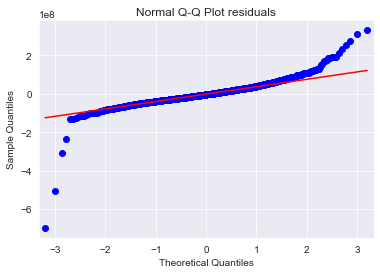

In [127]:
sm.qqplot(df3['Error'], line='q')
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [128]:
final_results = final_results.append({'Name': 'Square Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,86.958981,83.636167
1,Log Transformation,73.485187,77.222720
2,Square Transformation,77.036979,62.704416


# Square Root Transformation

In [129]:
X = np.sqrt(df[['Age_08_04', 'Weight', 'KM', 'HP']])
y = np.sqrt(df[['Price']])

In [130]:
X.head()

,Age_08_04,Weight,KM,HP
0,4.795832,34.132096,216.762543,9.486833
1,4.795832,34.132096,270.068510,9.486833
2,4.898979,34.132096,204.232710,9.486833
3,5.099020,34.132096,219.089023,9.486833
4,5.477226,34.205263,196.214169,9.486833


In [131]:
y.head()

,Price
0,116.189500
1,117.260394
2,118.110118
3,122.270193
4,117.260394


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [133]:
multiLR_model_Square_root= LinearRegression()
multiLR_model_Square_root.fit(X_train, y_train)

LinearRegression()

In [134]:
multiLR_model_Square_root.coef_

array([[-7.14372055,  4.41560087, -0.0429928 ,  2.88581381]])

In [135]:
X_train.columns

Index(['Age_08_04', 'Weight', 'KM', 'HP'], dtype='object')

In [136]:
enumerate(X_train.columns)

In [137]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model_Square_root.coef_[0][idx]))

The coefficient for Age_08_04 is -7.143720551757416
The coefficient for Weight is 4.415600870039057
The coefficient for KM is -0.04299279740575327
The coefficient for HP is 2.885813805853311


In [138]:
intercept = multiLR_model_Square_root.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.135635219235425


In [139]:
train_score = multiLR_model_Square_root.score(X_train, y_train)
train_score

0.8616902161421633

In [140]:
test_score = multiLR_model_Square_root.score(X_test, y_test)
test_score

0.8547936514175517

In [141]:
df4 = np.sqrt(df[['Age_08_04', 'Weight', 'KM', 'HP', 'Price']])
df4.head()

,Age_08_04,Weight,KM,HP,Price
0,4.795832,34.132096,216.762543,9.486833,116.189500
1,4.795832,34.132096,270.068510,9.486833,117.260394
2,4.898979,34.132096,204.232710,9.486833,118.110118
3,5.099020,34.132096,219.089023,9.486833,122.270193
4,5.477226,34.205263,196.214169,9.486833,117.260394


In [142]:
df4['y_pred'] = multiLR_model_Square_root.predict(X)
df4.head()

,Age_08_04,Weight,KM,HP,Price,y_pred
0,4.795832,34.132096,216.762543,9.486833,116.189500,126.376004
1,4.795832,34.132096,270.068510,9.486833,117.260394,124.084232
2,4.898979,34.132096,204.232710,9.486833,118.110118,126.177837
3,5.099020,34.132096,219.089023,9.486833,122.270193,124.110092
4,5.477226,34.205263,196.214169,9.486833,117.260394,122.714821


In [143]:
df4['Error'] = df4['Price'] - df4['y_pred']
df4.head()

,Age_08_04,Weight,KM,HP,Price,y_pred,Error
0,4.795832,34.132096,216.762543,9.486833,116.189500,126.376004,-10.186504
1,4.795832,34.132096,270.068510,9.486833,117.260394,124.084232,-6.823838
2,4.898979,34.132096,204.232710,9.486833,118.110118,126.177837,-8.067719
3,5.099020,34.132096,219.089023,9.486833,122.270193,124.110092,-1.839900
4,5.477226,34.205263,196.214169,9.486833,117.260394,122.714821,-5.454427


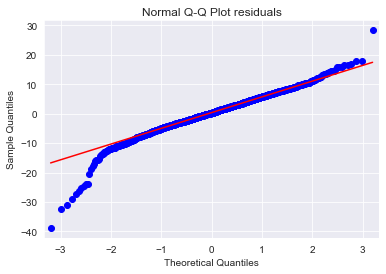

In [144]:
sm.qqplot(df4['Error'], line='q')
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [145]:
final_results = final_results.append({'Name': 'Square Root Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,86.958981,83.636167
1,Log Transformation,73.485187,77.222720
2,Square Transformation,77.036979,62.704416
3,Square Root Transformation,86.169022,85.479365


# So, we can conclude 'Square Root Transformation' is the best, because in Train we got 86% and in Test we got 85% Score and the variance is just 1 so we can consider this as final Algorithm with Square Root Transformation.

In [146]:
individual_rsquared_adj

,Name,Adjusted_Rsquare
0,Price ~ Age_08_04,76.824940
1,Price ~ Weight,33.732885
2,Price ~ KM,32.438378
3,Price ~ HP,9.859043
4,Price ~ Quarterly_Tax,4.738344
5,Price ~ Doors,3.367216
6,Price ~ cc,1.528802
7,Price ~ Gears,0.328752


# for only 'Price ~ Age_08_04 + Weight + KM + HP + Quarterly_Tax' columns we got Adjusted R^2 value of 86.2%